### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [36]:
import numpy as np

m = np.arange(12).reshape((3,4))
print("Matrix: \n", m)
for i, j in zip(range(m.shape[0]), range(m.shape[1])):
    print("Row", i, ": ", m[i, :], "mean: ", np.mean(m[i,:]))
    print("Column", i, ": ", m[:, i], "mean: ", np.mean(m[:,i]))

Matrix: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Row 0 :  [0 1 2 3] mean:  1.5
Column 0 :  [0 4 8] mean:  4.0
Row 1 :  [4 5 6 7] mean:  5.5
Column 1 :  [1 5 9] mean:  5.0
Row 2 :  [ 8  9 10 11] mean:  9.5
Column 2 :  [ 2  6 10] mean:  6.0


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations


In [37]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

# 1

print("numpy function outer: \n", np.outer(u, v))

# 2

outer = np.array([i*j for i in u for j in v]).reshape(len(u), len(v))
print("list comprehension\n", outer)
    
# 3

print("broadcasting: \n", np.ones([len(u), len(v)])*v*u.reshape(-1,1))

numpy function outer: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
list comprehension
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
broadcasting: 
 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [43]:
import numpy.random as npr
m = npr.rand(10,6)
print(m)
m[m < 0.1] = 0
print(m)

[[1.43486485e-01 5.00721668e-01 3.20055111e-01 4.71245360e-01
  2.93783352e-01 7.52340148e-01]
 [1.13555573e-04 5.63133051e-01 6.56928576e-01 9.42757172e-01
  7.27633288e-01 3.09064551e-01]
 [2.54900336e-01 6.09270687e-02 8.89483605e-01 4.27238349e-01
  3.86602318e-01 1.98957548e-01]
 [2.87679473e-01 4.69682260e-01 2.95562306e-01 8.67970375e-01
  5.53037042e-01 6.88007194e-01]
 [3.61591748e-01 1.76710572e-01 1.84001843e-01 4.75591669e-01
  5.21829406e-01 4.11457838e-01]
 [9.76204096e-01 5.18000809e-01 9.16116681e-01 9.54584447e-01
  7.01979092e-02 9.25525147e-01]
 [6.97234056e-01 6.57579455e-02 3.49951969e-01 1.06262726e-01
  5.62153530e-01 7.96341091e-01]
 [9.05658522e-01 2.27669318e-01 2.56899804e-01 4.53499694e-01
  2.38821906e-01 7.31874904e-01]
 [9.31577061e-01 4.69792962e-01 4.02869916e-01 8.90454876e-01
  4.50774397e-02 2.74556109e-01]
 [9.95881620e-01 7.38227209e-01 5.25760064e-01 7.96586816e-01
  9.00225628e-01 4.72546886e-01]]
[[0.14348649 0.50072167 0.32005511 0.47124536 0.2

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

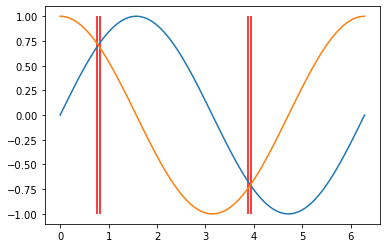

[0.76159822 0.82506474 3.87145761 3.93492413]


In [57]:
l = np.linspace(0, 2*np.pi,100)

l_sliced = l[::10]

l_reversed = l[::-1]

l_extract = l[abs(np.sin(l)-np.cos(l))<0.1]

import matplotlib.pyplot as plt
plt.plot(l,np.sin(l))
plt.plot(l,np.cos(l))
plt.vlines(l_extract, -1, 1, colors='r')
plt.show()

print(l_extract)

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [68]:
m = np.fromfunction(lambda i, j: (i+1)*(j+1), (10, 10))
print(m)
print("Trace: ", np.trace(m))
ant_diag = np.fliplr(m).diagonal()
print("Antidiagonal: ", ant_diag)
m_ = m[1:,:]
off_diag = m_.diagonal()
print("diagonal w offset: ", off_diag)

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]
Trace:  385.0
Antidiagonal:  [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
diagonal w offset:  [ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [81]:
positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
grid = np.tile(positions, (len(positions), 1)).T
for i in range(len(positions)):
    grid[:,i] = abs(grid[:,i] - np.ones(len(positions))*positions[i])*1.6
print(grid)

[[   0  316  484 1177 1393 1880 2360 2470 3060 3916]
 [ 316    0  168  860 1076 1563 2043 2153 2744 3600]
 [ 484  168    0  692  908 1395 1875 1985 2576 3432]
 [1177  860  692    0  216  702 1182 1292 1883 2739]
 [1393 1076  908  216    0  486  966 1076 1667 2523]
 [1880 1563 1395  702  486    0  480  590 1180 2036]
 [2360 2043 1875 1182  966  480    0  110  700 1556]
 [2470 2153 1985 1292 1076  590  110    0  590 1446]
 [3060 2744 2576 1883 1667 1180  700  590    0  856]
 [3916 3600 3432 2739 2523 2036 1556 1446  856    0]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

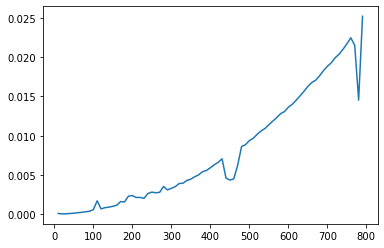

In [122]:
import time
def prime_check(N):
    start_time = time.time()
    mask = np.full((N,), True)
    mask[0] = False
    mask[1] = False
    for i in range(2,N):
        for j in range(i-2):
            if(i%(2+j)==0):
                  mask[i] = False
    return time.time() - start_time 

Ns = [10*i for i in range(1,80)]
times = []
for N in Ns:
      times.append(prime_check(N))
        
plt.plot(Ns, times)
plt.show()

The growth seems to be $O(N^2)$

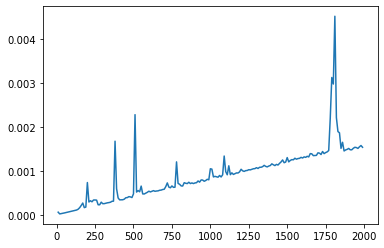

In [128]:
def better_prime_check(N):
    start_time = time.time()
    mask = np.full((N,), True)
    mask[0] = False
    mask[1] = False
    for i in range(2,N):
        if(mask[i]==True):
            mask[i**2::i] = False
    return time.time() - start_time 

Ns = [10*i for i in range(1,200)]
times = []
for N in Ns:
      times.append(better_prime_check(N))
        
plt.plot(Ns, times)
plt.show()

Instead, this time we have linear growth, $O(N)$

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

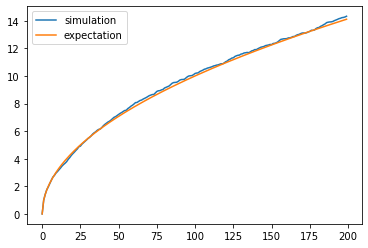

In [26]:
walkers = 1000
steps   = 200

# use randint to create a 2D array of size walkers x steps with values -1 or 1
m = npr.randint(0, 2, size = (walkers, steps))
m[m==0] = -1

# build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
walker_distances = np.empty_like(m)
for i in range(0,steps):
    walker_distances[:,i] = m[:,:i].sum(axis = 1)

# compute the mean of the squared distances at each step (i.e. the mean along the columns)
mean_sq_dist = (walker_distances**2).mean(axis = 0)

# plot the average distances (sqrt(distance**2)) as a function of time (step)
plt.plot(range(steps), np.sqrt(mean_sq_dist), label = "simulation")
plt.plot(range(steps), np.sqrt(range(steps)), label = "expectation")
plt.legend()
plt.show()


From the models of theoretical physiscs derivation we expect:
$$ <x^2> = 2Dt \,, D = \frac{l^2}{2 \epsilon} = 1/2 \rightarrow \sigma \propto \sqrt t $$

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [28]:
# download the population of hares, lynxes and carrots at the beginning of the last century.
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    
# load the data (use an appropriate numpy method) into a 2D array
populations = np.loadtxt('populations.txt')

--2021-11-11 00:59:24--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2021-11-11 00:59:24--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6dd4f1388dee33f88afaa292c9.dl.dropboxusercontent.com/cd/0/inline/BZuFHH_IbFOcjSwy9leAgjxhsVfMe1JGT96qBMdbDesem1IS4N2uSP8EO0mPon-U_UezlMIuEkQyZrmCEzOJjwGTm-dnwVt15fb3M-IR8Si1yYsR16MEo4WMYiYffit7Xo5E09pJBpPFMDVkePSswmUH/file# [following]
--2021-11-11 00:59:25--  https://uc6dd4f1388dee33f88afaa292c9.dl.dropboxusercontent.com/cd/0/inline/BZuFHH_IbFOcjSwy9leAgjxhsVfMe1JGT96qBMdbDesem1IS4N2uSP8EO0mPon-U_UezlMIuEkQyZr

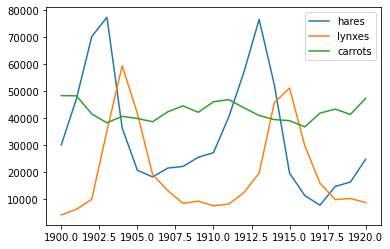

Hares  | mean: 34081.0 | std: 20897.9
Lynxes | mean: 20166.7 | std: 16254.6
Hares  | mean: 42400.0 | std: 3322.5
Hares   - Lynxes   | coefcorr: 0.072
Hares   - Carrots  | coefcorr: -0.017
Carrots - Lynxes   | coefcorr: -0.681


In [47]:
# create arrays out of the columns, the arrays being (in order): year, hares, lynxes, carrots
year = populations[:,0]
hares = populations[:,1]
lynxes = populations[:,2]
carrots = populations[:,3]

# plot the 3 populations over the years
plt.plot(year, hares, label = "hares")
plt.plot(year, lynxes, label = "lynxes")
plt.plot(year, carrots, label = "carrots")
plt.legend()
plt.show()

# compute the main statistical properties of the dataset (mean, std, correlations, etc.)e
print("Hares  | mean: %6.1f | std: %6.1f"%(hares.mean(), hares.std()))
print("Lynxes | mean: %6.1f | std: %6.1f"%(lynxes.mean(), lynxes.std()))
print("Hares  | mean: %6.1f | std: %6.1f"%(carrots.mean(), carrots.std()))

# look at the correlations
print("Hares   - Lynxes   | coefcorr: %4.3f"%(np.corrcoef(hares, lynxes)[0,1]))
print("Hares   - Carrots  | coefcorr: %4.3f"%(np.corrcoef(hares, carrots)[0,1]))
print("Carrots - Lynxes   | coefcorr: %4.3f"%(np.corrcoef(carrots, lynxes)[0,1]))

Only looking at coeffcorr results it seems that the populations aren't correlated. Instead, looking at the plot, we observe a clear correlation between hares and lynxes, the fact is that this correlation is delated in time so we can't see directly comparing same year number of population. One should compute the delay between the cause-effect dynamic for computing an effective correlation.

In the article reported they stated a delay period of 3, 4 years, we can compute correlations shifting lynxes data of -1/ 2 /3 /4 years and only looking at a specific period i.e. [1900, 1917] ( hares referred)

In [52]:
# look at the hares - lynxes correlation with lynxes anticipated of 3 years
hares_d  = hares[:-1]
lynxes_d = lynxes[1:]
print("Hares   - Lynxes (-3y)  | coefcorr: %4.3f"%(np.corrcoef(hares_d, lynxes_d)[0,1]))

hares_d  = hares[:-2]
lynxes_d = lynxes[2:]
print("Hares   - Lynxes (-3y)  | coefcorr: %4.3f"%(np.corrcoef(hares_d, lynxes_d)[0,1]))

hares_d  = hares[:-3]
lynxes_d = lynxes[3:]
print("Hares   - Lynxes (-3y)  | coefcorr: %4.3f"%(np.corrcoef(hares_d, lynxes_d)[0,1]))

hares_d  = hares[:-4]
lynxes_d = lynxes[4:]
print("Hares   - Lynxes (-3y)  | coefcorr: %4.3f"%(np.corrcoef(hares_d, lynxes_d)[0,1]))

Hares   - Lynxes (-3y)  | coefcorr: 0.728
Hares   - Lynxes (-3y)  | coefcorr: 0.927
Hares   - Lynxes (-3y)  | coefcorr: 0.576
Hares   - Lynxes (-3y)  | coefcorr: 0.086


So, looking at the correlations we can suppose a delay of 2 years between the cause-effect dynamics among hares and lynxes

In [56]:
max_pop = []
pops = ["Hares", "Lynxes", "Carrots"]
for i in range(len(year)):
    max_pop.append(pops[np.array([hares[i], lynxes[i], carrots[i]]).argmax()])
print("max populations for year: \n", max_pop)

max populations for year: 
 ['Carrots', 'Carrots', 'Hares', 'Hares', 'Lynxes', 'Lynxes', 'Carrots', 'Carrots', 'Carrots', 'Carrots', 'Carrots', 'Carrots', 'Hares', 'Hares', 'Hares', 'Lynxes', 'Carrots', 'Carrots', 'Carrots', 'Carrots', 'Carrots']
